In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import matplotlib.font_manager as fm
import matplotlib

font_path = 'C:\\Windows\\Fonts\\gulim.ttc'
font = fm.FontProperties(fname=font_path).get_name()
matplotlib.rc('font', family=font)

### 1. 데이터 로드 - OkCupid

In [4]:
df = pd.read_csv('./data/okcupid_profiles.csv', encoding='UTF-8')
df.info()
# 59946 rows X 31 culumns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   status       59946 non-null  object 
 2   sex          59946 non-null  object 
 3   orientation  59946 non-null  object 
 4   body_type    54650 non-null  object 
 5   diet         35551 non-null  object 
 6   drinks       56961 non-null  object 
 7   drugs        45866 non-null  object 
 8   education    53318 non-null  object 
 9   ethnicity    54266 non-null  object 
 10  height       59943 non-null  float64
 11  income       59946 non-null  int64  
 12  job          51748 non-null  object 
 13  last_online  59946 non-null  object 
 14  location     59946 non-null  object 
 15  offspring    24385 non-null  object 
 16  pets         40025 non-null  object 
 17  religion     39720 non-null  object 
 18  sign         48890 non-null  object 
 19  smok

### 2. last_online 컬럼 탐색 - y 데이터 유력

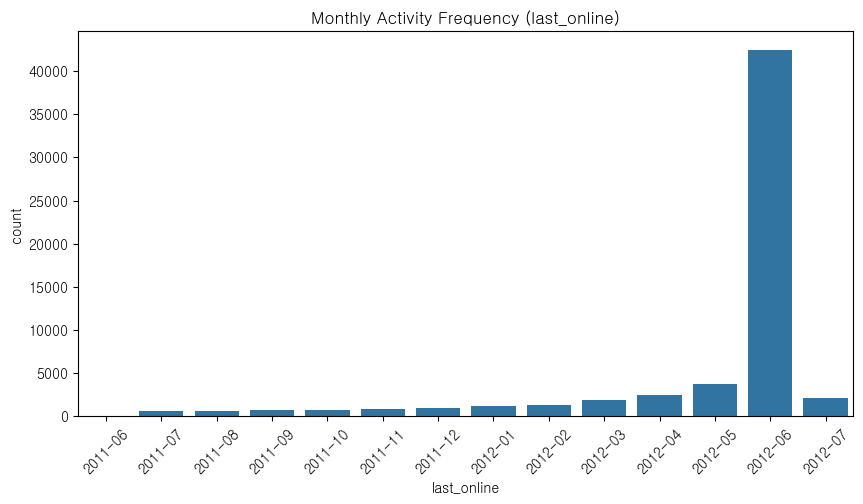

In [5]:
# last_online 컬럼 datetime 변환 및 시각화

df['last_online'] = pd.to_datetime(df['last_online'], format='%Y-%m-%d-%H-%M')  # datetime 형으로 변환
df['last_online'] = df['last_online'].dt.to_period('M').astype(str)             # 연-월 단위 묶음
df = df.sort_values('last_online')                                              # 시간순 오름차순 정렬

plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='last_online')         # 해당 dataframe 내 특정 컬럼의 value count를 시각화

plt.title('Monthly Activity Frequency (last_online)')
plt.xticks(rotation=45)                                 # 글자가 겹치지 않게 회전
plt.show()

### 3. 컬럼들 라벨 인코딩

In [6]:
# 3-1. sex 컬럼 라벨 인코딩 -> sex_label
df['sex_label'] = np.select(
    [df['sex'] == 'm', df['sex'] == 'f'], 
    [1, 2],
    default=0
)
# df['sex_label'].value_counts()

In [7]:
# 3-2. orientation 컬럼 라벨 인코딩 -> orientation_label
df['orientation_label'] = np.select(
    [df['orientation'] == 'straight', df['orientation'] == 'gay', df['orientation'] == 'bisexual'], 
    [1, 2, 3],
    default=0
)
# df['orientation_label'].value_counts()

In [8]:
# 3-3. income 컬럼 라벨 인코딩 -> income_label
df['income_label'] = np.select(
    [df['income'] == 20000, df['income'] == 30000, df['income'] == 40000,
     df['income'] == 50000, df['income'] == 60000, df['income'] == 70000,
     df['income'] == 80000, df['income'] >= 100000], 
    [1, 2, 3, 4, 5, 6, 7, 8],
    default=0
)
# df['income_label'].value_counts()

In [9]:
# 3-4. last_online 컬럼 라벨 인코딩 -> last_online_label
df['last_online_label'] = np.select(
    [df['last_online'] < '2012-06'], 
    [1],
    default=0
)
df['last_online_label'].value_counts()

last_online_label
0    44561
1    15385
Name: count, dtype: int64

### 4. X 데이터들과 y 데이터 히트맵 그리기

<Axes: >

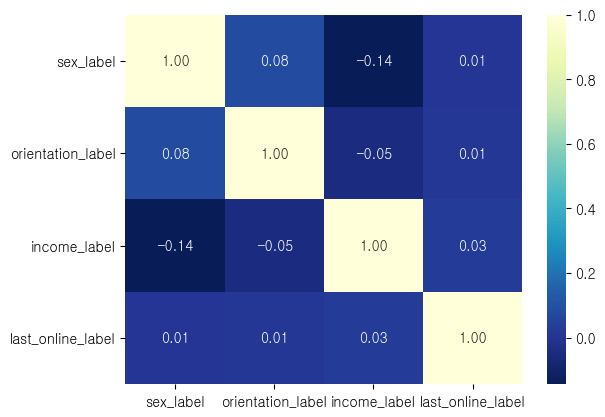

In [10]:
corr_matrix = df[['sex_label', 'orientation_label', 'income_label', 'last_online_label']].corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='YlGnBu_r', )

# 임의로 라벨 인코딩한 값들이어서인지 특별한 상관관계는 안 보임

### 회의 후 : 18개 컬럼 전처리 시작->

In [11]:
# height 전처리

df = df.drop(df.index[df['height'].isna()])     # 결측치 3개 제거
df = df.drop(df.index[df['height'] < 30])       # 이상치 7개 제거 : 30inch = 76.2cm

# -------------------------------------------
# height 컬럼 boxplot 시각화

# plt.boxplot(df['height'])
# plt.xlabel('x')
# plt.ylabel('height')
# plt.show()

In [12]:
# job 컬럼 인코딩

df['job_encoding'] = np.select(
    [((df['job'] == 'science / tech / engineering') | (df['job'] == 'computer / hardware / software')),
     ((df['job'] == 'sales / marketing / biz dev') | (df['job'] == 'executive / management') | (df['job'] == 'banking / financial / real estate')),
     ((df['job'] == 'artistic / musical / writer') | (df['job'] == 'entertainment / media')),
     ((df['job'] == 'education / academia') | (df['job'] == 'medicine / health') | (df['job'] == 'political / government') | (df['job'] == 'law / legal services')),
     ((df['job'] == 'hospitality / travel') | (df['job'] == 'construction / craftsmanship') | (df['job'] == 'clerical / administrative') | (df['job'] == 'transportation') | (df['job'] == 'military'))],
     # student, unemployed, retired, other, rather not say, 결측치는 모두 6
    [1, 2, 3, 4, 5],
    default=6
)

# job_encoding 컬럼의 value_count() 출력
print(df['job_encoding'].value_counts())

job_encoding
6    21626
1     9555
4     9281
2     9030
3     6685
5     3759
Name: count, dtype: int64


In [13]:
# status 컬럼 인코딩

df['status_encoding'] = np.select(
    [df['status'] == 'single'], 
    [1],
    default=0
)

# status_encoding 컬럼의 value_count() 출력
print(df['status_encoding'].value_counts())

status_encoding
1    55687
0     4249
Name: count, dtype: int64


In [14]:
# diet 컬럼 인코딩

df['diet_encoding'] = np.select(
    [((df['diet'] == 'vegetarian') | (df['diet'] == 'mostly vegetarian') | (df['diet'] == 'strictly vegetarian') |\
      (df['diet'] == 'vegan') | (df['diet'] == 'mostly vegan') | (df['diet'] == 'strictly vegan'))], 
    [1],
    default=0
)

# diet_encoding 컬럼의 value_count() 출력
print(df['diet_encoding'].value_counts())

diet_encoding
0    54249
1     5687
Name: count, dtype: int64


In [15]:
# pets 컬럼 인코딩 -> dogs_encoding, cats_encoding

df['dogs_encoding'] = np.select(
    [((df['pets'] == 'has dogs') | (df['pets'] == 'likes dogs and likes cats') |\
      (df['pets'] == 'likes dogs and has cats') | (df['pets'] == 'likes dogs') |\
      (df['pets'] == 'has dogs and has cats') | (df['pets'] == 'has dogs and dislikes cats') |\
      (df['pets'] == 'has dogs and likes cats') | (df['pets'] == 'likes dogs and dislikes cats'))], 
    [1],
    default=0
)

df['cats_encoding'] = np.select(
    [((df['pets'] == 'has cats') | (df['pets'] == 'likes dogs and likes cats') |\
      (df['pets'] == 'likes dogs and has cats') | (df['pets'] == 'likes cats') |\
      (df['pets'] == 'has dogs and has cats') | (df['pets'] == 'has dogs and likes cats') |\
      (df['pets'] == 'dislikes dogs and likes cats') | (df['pets'] == 'dislikes dogs and has cats'))], 
    [1],
    default=0
)

# dogs_encoding 컬럼과 cats_encoding 컬럼의 value_count() 출력
print(df['dogs_encoding'].value_counts())
print(df['cats_encoding'].value_counts())

dogs_encoding
1    36867
0    23069
Name: count, dtype: int64
cats_encoding
0    34217
1    25719
Name: count, dtype: int64


##### preprocessing.ipynb : 전처리 통합본